# 线性回归模型实例：商品价格预测

## 读取数据

In [1]:
import numpy as np
import pandas as pd

###线性回归####
# 读取数据
data = pd.read_csv('data/Advertising.csv', index_col=0)

data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 画散点图

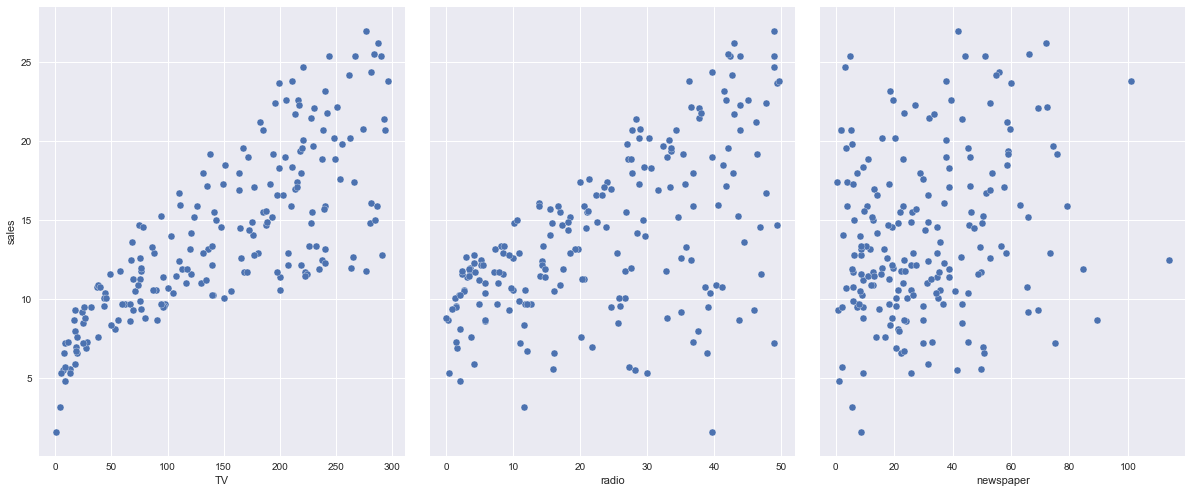

In [2]:
# 画散点图
import seaborn as sns
import matplotlib
# %matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
%matplotlib inline
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.8)

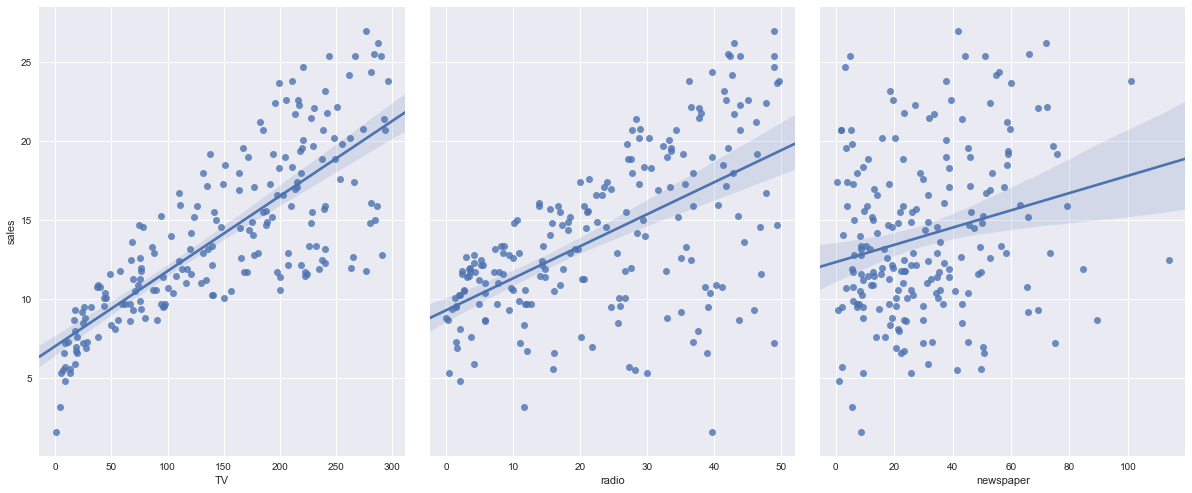

In [3]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.8, kind='reg')

## 计算相关系数矩阵

In [4]:
# 计算相关系数矩阵
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## 构建X、Y数据集

In [5]:
# 构建X、Y数据集
X = data[['TV', 'radio', 'newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [6]:
y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

## 直接根据系数矩阵公式计算

In [7]:
##直接根据系数矩阵公式计算
def standRegres(xArr, yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T * xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * yMat)
    return ws

## 求解回归方程系数

In [8]:
# 求解回归方程系数
X2 = X
# 加一列值全部为1的列，为了计算截距，y=kx+b中的b，因为是矩阵计算，所以要加200个1
X2['intercept'] = [1] * 200
standRegres(X2, y)

matrix([[  4.57646455e-02],
        [  1.88530017e-01],
        [ -1.03749304e-03],
        [  2.93888937e+00]])

上面是直接根据系数矩阵公式计算出的结果，可以看出newspaper对于销售额有反向的作用。

下面我们利用 sklearn.linear_model 中 LinearRegression 求解回归方程，看一下结果怎样

## 利用现有库求解

In [9]:
##利用现有库求解
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
# 拟合
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
# 截距
print(linreg.intercept_)
# 参数
print(linreg.coef_)
print(list(zip(['TV', 'radio', 'newspaper'], linreg.coef_)))

2.93888936946
[ 0.04576465  0.18853002 -0.00103749  0.        ]
[('TV', 0.045764645455397615), ('radio', 0.18853001691820462), ('newspaper', -0.0010374930424762972)]


得到的结论和利用公式的结果一致：newspaper对于销售额有反向的作用。

在做回归分析的时候，我们需要把样本数据拆分成训练集和测试集，训练集用来训练模型，得出训练结果，测试集用来测试训练结果。

# 训练集和测试集的构建

In [11]:
##测试集和训练集的构建
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 拟合

In [12]:
# 拟合
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 结果

In [13]:
# 结果
print(linreg.intercept_)
print(linreg.coef_)
print(list(zip(['TV', 'radio', 'newspaper'], linreg.coef_)))

2.87696662232
[ 0.04656457  0.17915812  0.00345046  0.        ]
[('TV', 0.046564567874150281), ('radio', 0.17915812245088839), ('newspaper', 0.00345046471118041)]


## 预测

In [14]:
# 预测
y_pred = linreg.predict(X_test)

## 误差评估

In [15]:
# 误差评估
from sklearn import metrics

# calculate MAE using scikit-learn
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.06689170826
MSE: 1.97304562023
RMSE: 1.40465142303


由于 newspaper 有反作用，尝试去掉 newspaper ，对比一下结果

## 测试集和训练集的构建

In [16]:
# 模型比较 去掉newspaper
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 拟合

In [17]:
# 拟合
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 预测

In [18]:
# 预测
y_pred = linreg.predict(X_test)

## 误差评估

In [19]:
# 误差评估
# calculate MAE using scikit-learn
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# calculate MSE using scikit-learn
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# calculate RMSE using scikit-learn
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.04775904112
MSE: 1.92627604187
RMSE: 1.38790346994


误差变小了，可见去掉 newspaper 数据后，拟合效果更好了。

参考资料：炼数成金Python数据分析课程